# Seaborn 개요
- matplotlib의 성능 및 디자인을 업그레이드
- DataFrame을 대상으로 시각화 한다.
- 공식사이트 https://seaborn.pydata.org/

## 실습 데이터셋 확인

In [43]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 셋팅
matplotlib.rcParams['font.size'] = 12 # 폰트 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 유니코드가 '-'기호로 설정되는 폰트가 깨지는 것을 방지
plt.style.use('default')



In [6]:
import seaborn as sns

# 샘플 데이터셋 로딩
# seaborn 데이터셋 위치github.com/mwaskom/seaborn-data
df = sns.load_dataset('mpg')
print(df.shape)
df.head()
df.info()
df.describe(include= 'object')

(398, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


In [7]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

# 관계형 그래프

## reㅣplot()
- 변수간의 상관성을 시각화 하는 그래프
- 주요 파라미터
    - kind: 그래프의 종류를 선택 (선택값: 'line','scatter'(default))
    - hue: 주어진 범주형 데이터에 따른 데이터를 다른 색으로 구분해서 보여준다

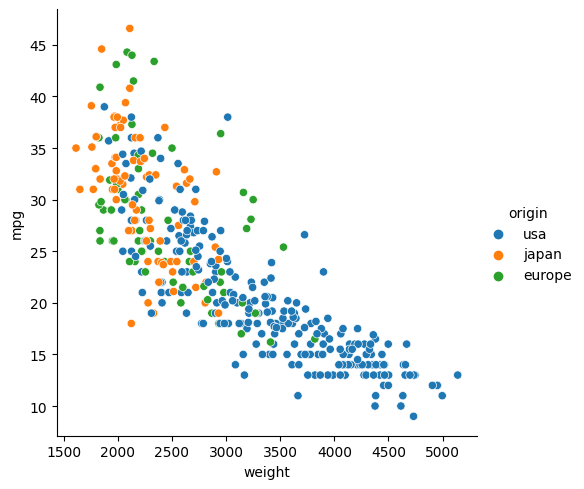

In [10]:
sns.relplot(data = df, x='weight', y = 'mpg',hue ='origin')
plt.show()


- col 매개변수에 범주형 컬럼을 지정하여 해당 컬럼의 범주 값 만큼 그래프를 분할하여 보여준다.


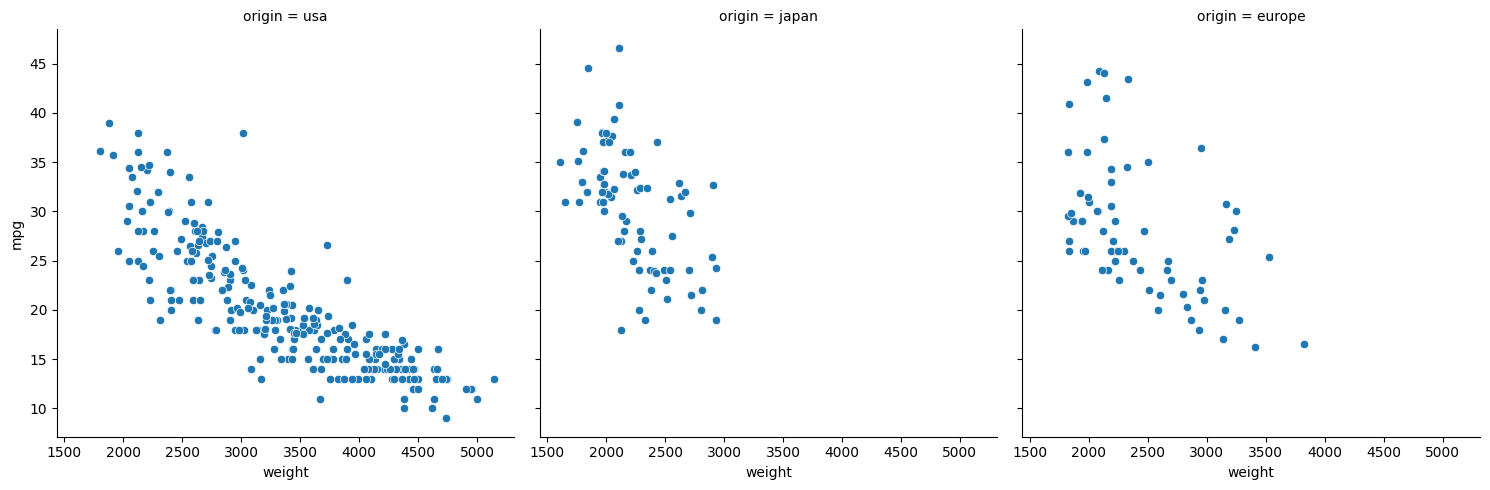

In [11]:
sns.relplot(data=df,x='weight',y = 'mpg',col='origin')
plt.show()

## regplot()
- 선형회귀선을 추가적으로 보여준다

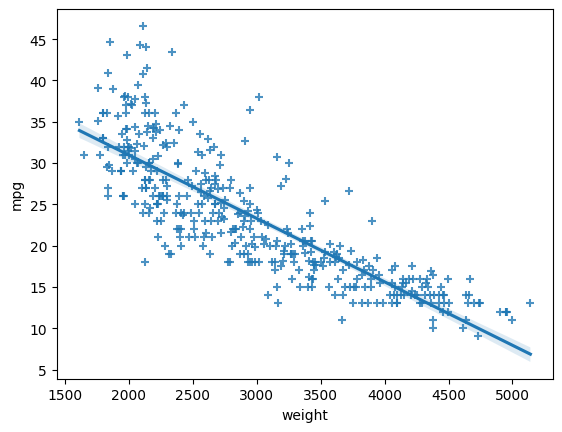

In [13]:
sns.regplot(data = df, x = 'weight', y='mpg' ,marker = '+')
plt.show()

## pairplot()
- 각 변수들의 분포와 모든 변수들간의 분포 관계를 보여준다.
- 시간이 오래 걸림 (원하는 컬럼만 추출해서 그릴 수 있다)
    -var: 보고 싶은 컬럼명을 리스트로 전달

<function matplotlib.pyplot.show(close=None, block=None)>

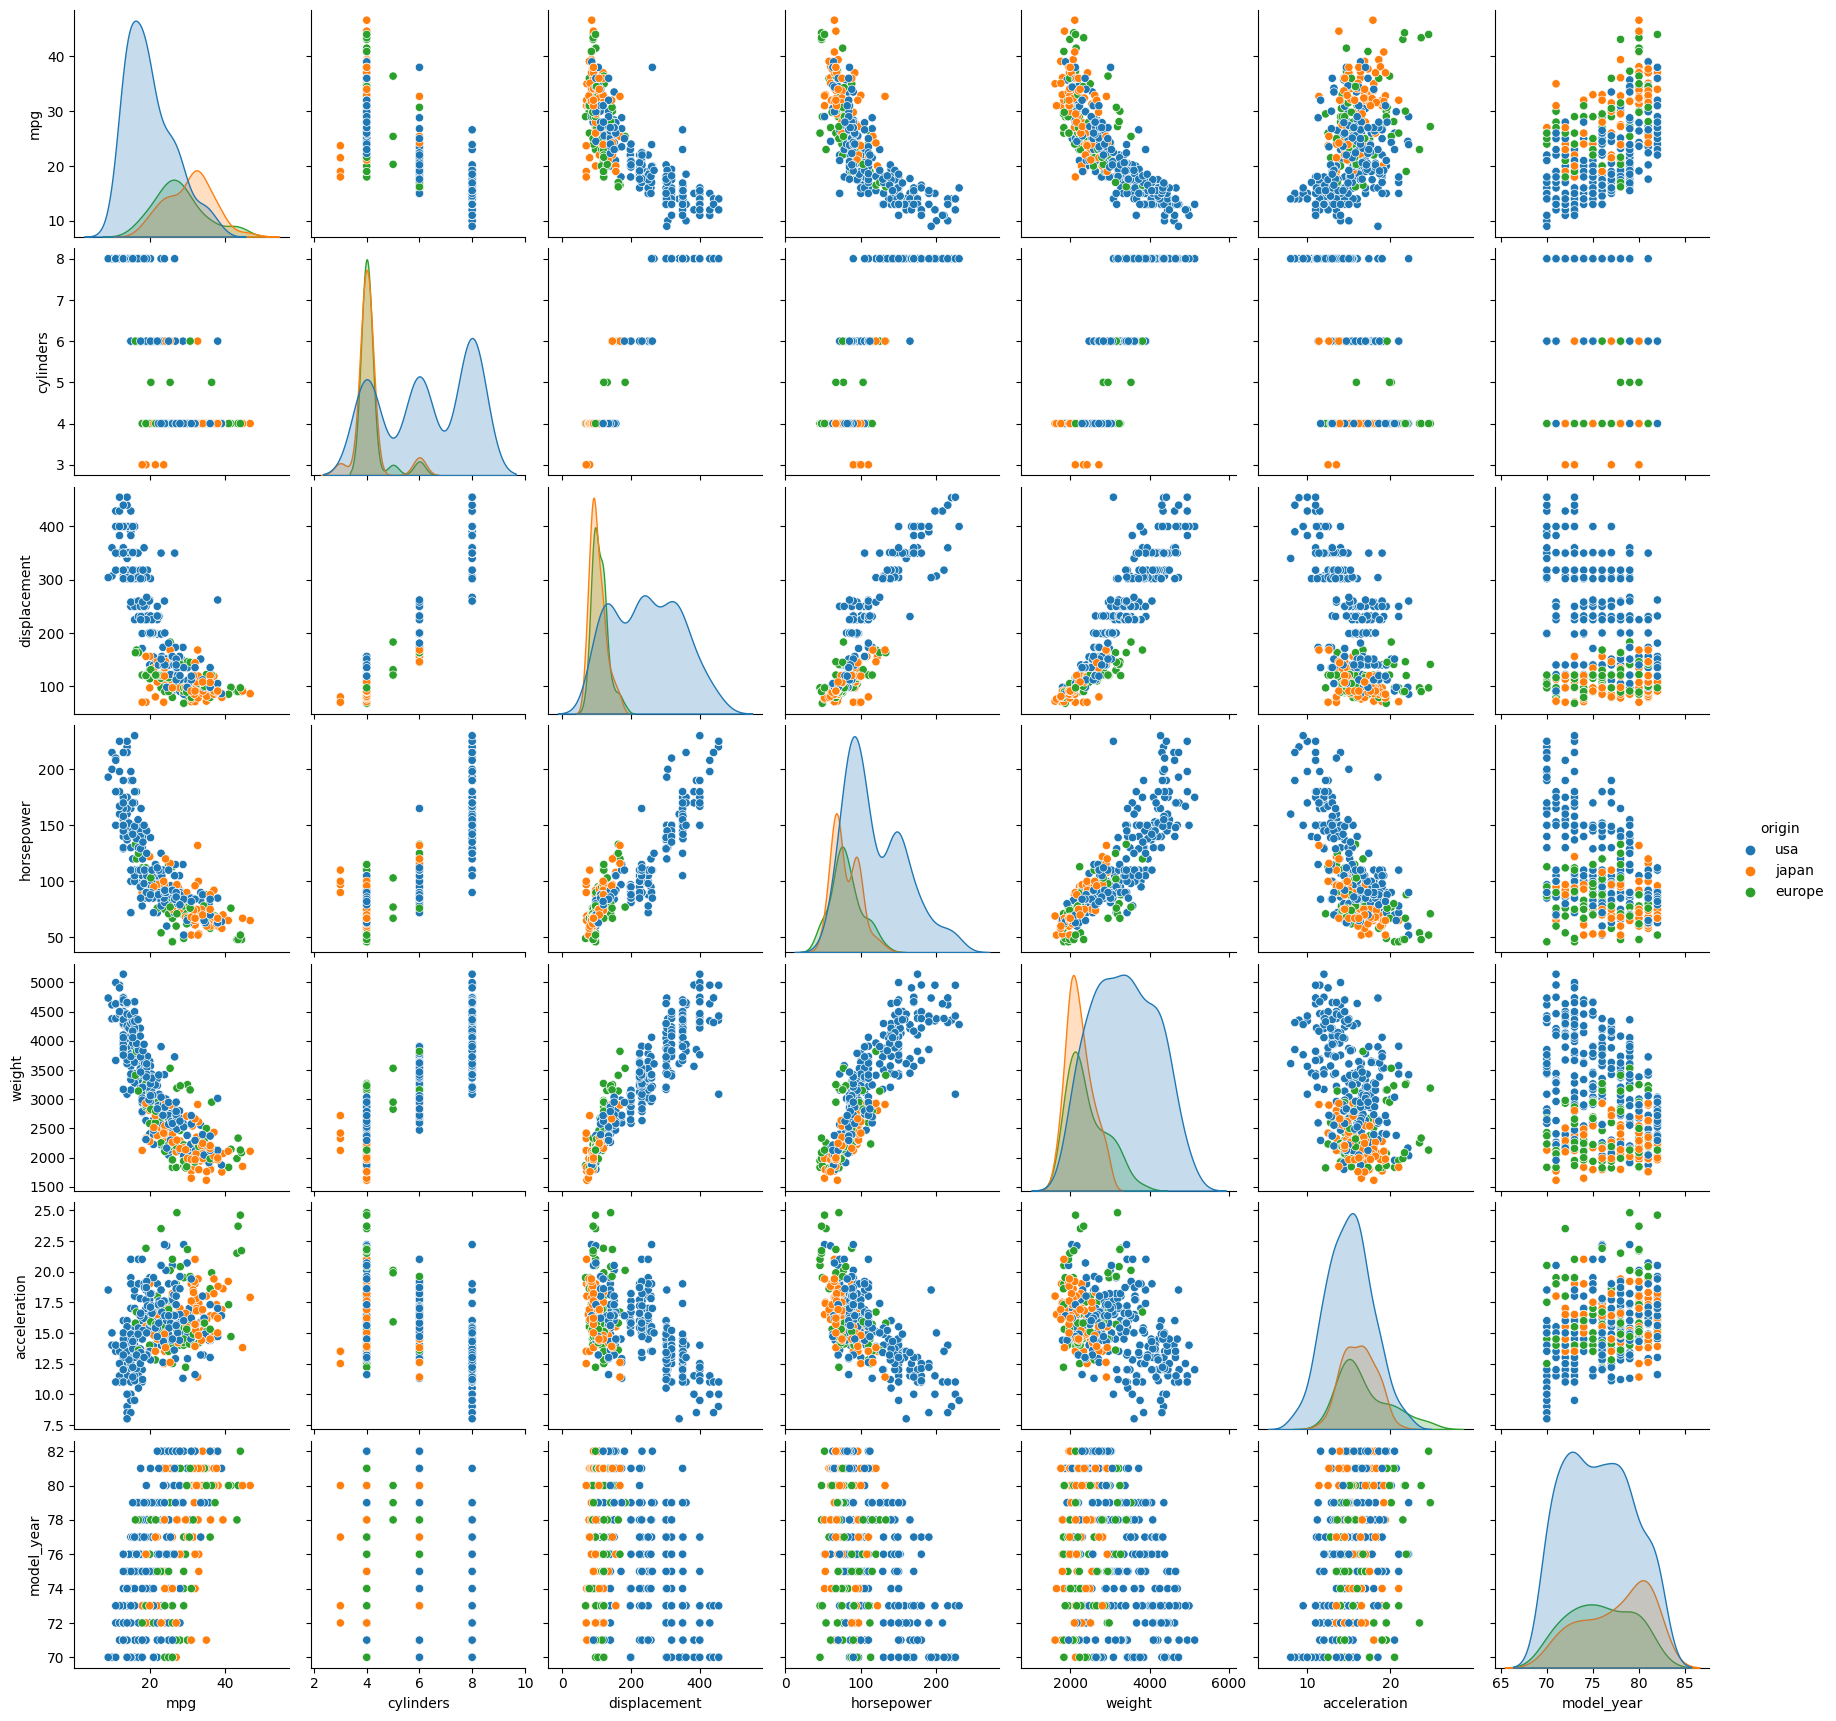

In [14]:
sns.pairplot(data=df,hue='origin')
plt.show

## lineplot()
- 연속형 데이터에 대한 관계를 선 그래프로 보여준다.
- 같은 x값에 대해 여러 개의 y값을 갖는 경우에는 각 x값에 대한 평균(실선)과,95%의 신뢰 구간을 평균 위주로 보여준다
- lineplot()은 그래프를 그리기 전에 x값을 기준으로 데이터를 정렬하고 그래프를 그려준다

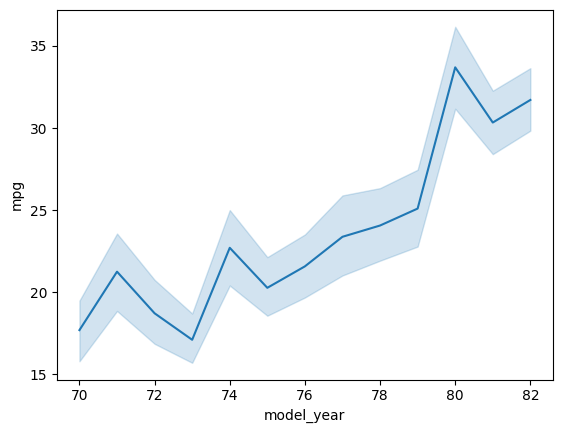

In [70]:
# ci(errorbar) : 신뢰구간이 그림자로 나타남, 없애기 위해서는 None으로 지정
sns.lineplot(data=df, x="model_year", y="mpg",errorbar =None)
plt.show()

## heatmap()
- 데이터의 상관관계 정도에 따라 색차이를 부여한 그래프


In [24]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
iris['species'].unique()
iris.head()
iris.columns = ['꽃받침 길이','꽃받침 넓이','꽃잎 길이','꽃잎 넓이','품종']
iris.head()

,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃잎 넓이,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
iris_2 = iris.iloc[:,:4]

In [30]:
corr = iris_2.corr()
corr

,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃잎 넓이
꽃받침 길이,1.000000,-0.117570,0.871754,0.817941
꽃받침 넓이,-0.117570,1.000000,-0.428440,-0.366126
꽃잎 길이,0.871754,-0.428440,1.000000,0.962865
꽃잎 넓이,0.817941,-0.366126,0.962865,1.000000


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from current font.
  fig.canvas.draw()
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 48155 (\N{HANGUL SYLLABLE BAD}) missing from current font.
  fig.canvas.draw()
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 52840 (\N{HANGUL SYLLABLE CIM}) missing from current font.
  fig.canvas.draw()
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from current font.
  fig.canvas.draw()
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
c:\Users\user\AppData\Local\Programs\Python\Py

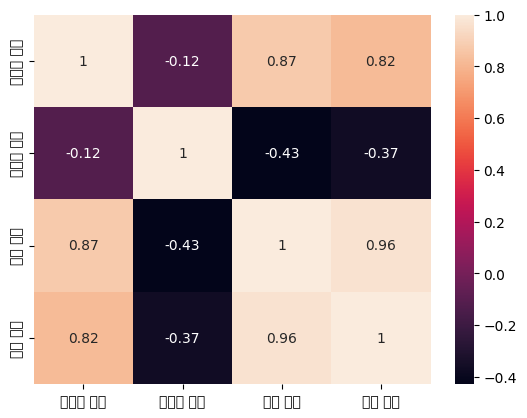

In [53]:
sns.heatmap(corr,annot = True)
plt.show()

# 분포형 그래프

## 히스토그램 : displot()
- 주요 파라미터
    - kde : True/False 값. 밀도를 추정할 수 있다.
    - kind : 값을 지정하지 않으면 기본으로 'hist'가 된다.('kde')


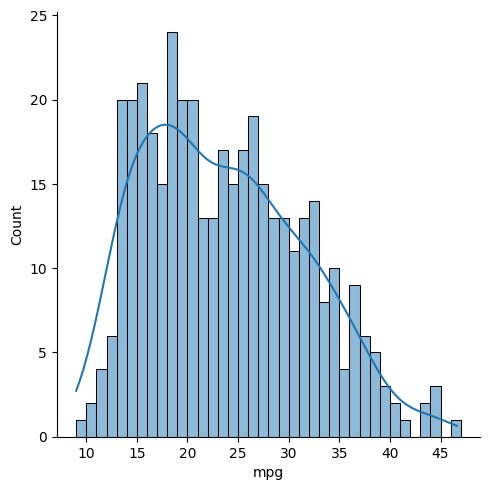

In [57]:
sns.displot(data = df, x='mpg',kde=True,binwidth=1)
plt.show()

- y 파라미터만 지정하면 가로로 된 히스토그램을 그린다.

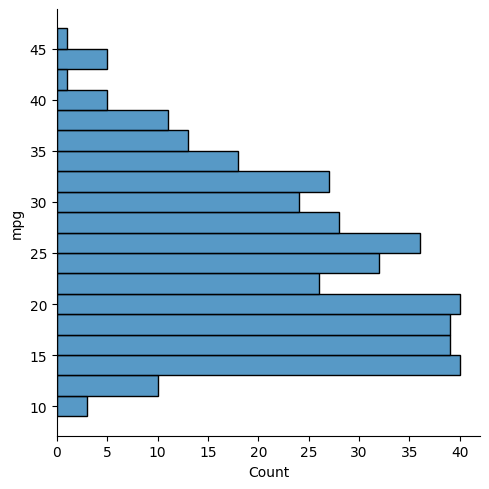

In [58]:
sns.displot(data = df, y ='mpg',binwidth =2)
plt.show()

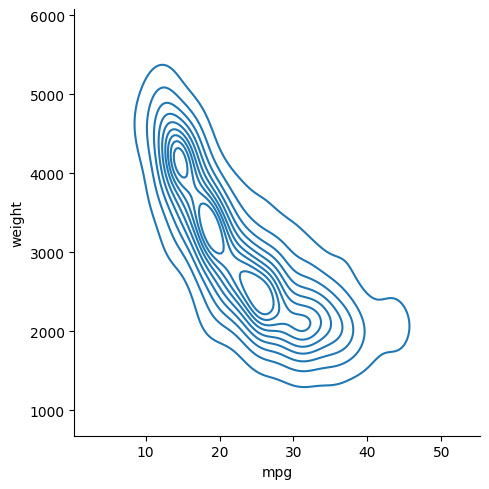

In [63]:
sns.displot(df, x='mpg',y='weight',kind= 'kde')#,rug =True)
plt.show()

## 히스토그램: histplot()

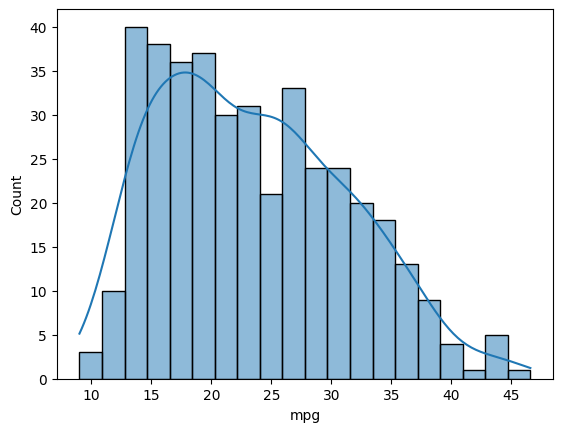

In [65]:
sns.histplot(df['mpg'], bins=20,kde =True)
plt.show()

## barplot()
- x축에는 범주형 변수, y축에는 연속형 변수를 입력
- x에 연속형, y에 범주형을 넣으면 수평 막대그래프를 출력
- estimator : 평균(기본값, mean), 합(sum), 카운트(len), 중앙값(np.median), 표준편차(np.std)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:76: UserWarning: Data contain nans but no nan-aware version of `size` found
  warnings.warn(msg, UserWarning)


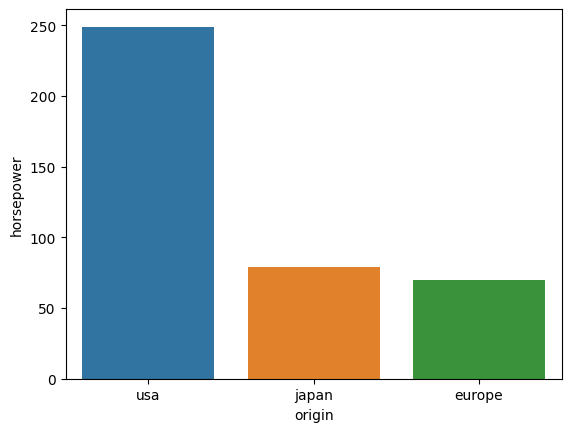

In [67]:
sns.barplot(data=df,x = 'origin',y='horsepower',estimator =len)
plt.show()

## boxplot()

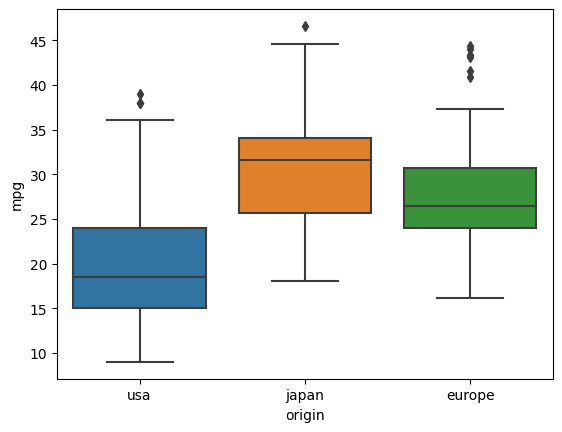

In [68]:
sns.boxplot(data=df,x = 'origin',y='mpg')
plt.show()

## violinplot()
- 데이터의 분포에 따라 통통하고 홀쭉하게 표현하는 모습이 바이올린을 닮은 그래프
- boxplot()은 이상치를 한 눈에 파악할 수 있고, violinplot()은 데이터 분포를 한눈에 파악할 수 있다.


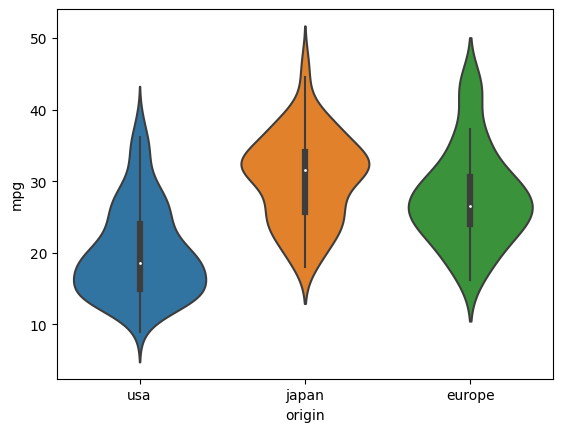

In [69]:
sns.violinplot(data = df, x = 'origin',y = 'mpg')
plt.show()